In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc

In [2]:
def make_graph(l=8, inv_k=1/2.0,vlen=100):
    graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,[(n**2)*inv_k for n in range(vlen)])
    return graph

In [8]:
ks = np.linspace(0.5, 10.0, 20)
windings = []

for k in ks:
    print(k)
    sub_windings = []
    for i in range(10):
        g = make_graph(l=16, inv_k=1/k, vlen=100)
        g.run_local_update(100)
        g.run_global_update()
        winding_var = g.simulate_and_get_winding_variance(1000,10)
        sub_windings.append(winding_var.mean())
    windings.append(sub_windings)
windings = np.array(windings)

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0


In [16]:
de_errored_windings = windings.copy()
de_errored_windings[de_errored_windings > 1e3] = 0

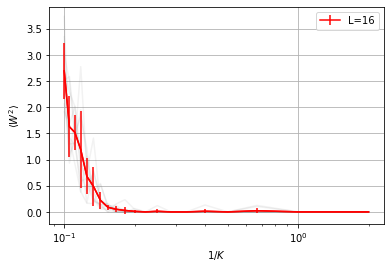

In [54]:
for i in range(de_errored_windings.shape[-1]):
    sub_windings = de_errored_windings[:,i]
    plt.plot(1/ks, sub_windings, c='grey',alpha=0.1)
plt.plot(1/ks, de_errored_windings.mean(axis=-1), c='r')
plt.errorbar(1/ks, 
             de_errored_windings.mean(axis=-1), 
             yerr=np.sqrt(de_errored_windings.var(axis=-1)), c='r',
             label='L=16')
plt.xscale('log')
plt.grid()
plt.ylabel(r'$\langle W^2 \rangle$')
plt.xlabel(r'$1/K$')
plt.legend()
plt.savefig('confinement.png', dpi=300)
plt.show()